### Bibliotecas

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, classification_report, confusion_matrix

### Carregar dados de treino e teste

In [2]:
import pickle

with open('../data/processed/train_test_data.pkl', 'rb') as f:
    x_train, x_test, y_train, y_test = pickle.load(f)

### Treinamento o Modelo

In [3]:
rf = RandomForestClassifier(class_weight='balanced')
rf.fit(np.array(x_train), np.array(y_train['Churn']))

RandomForestClassifier(class_weight='balanced')

#### Importância das Features

In [4]:
feature_importances = pd.DataFrame(rf.feature_importances_, 
                                   index = x_train.columns, 
                                   columns=['importance']).sort_values('importance', ascending=False)

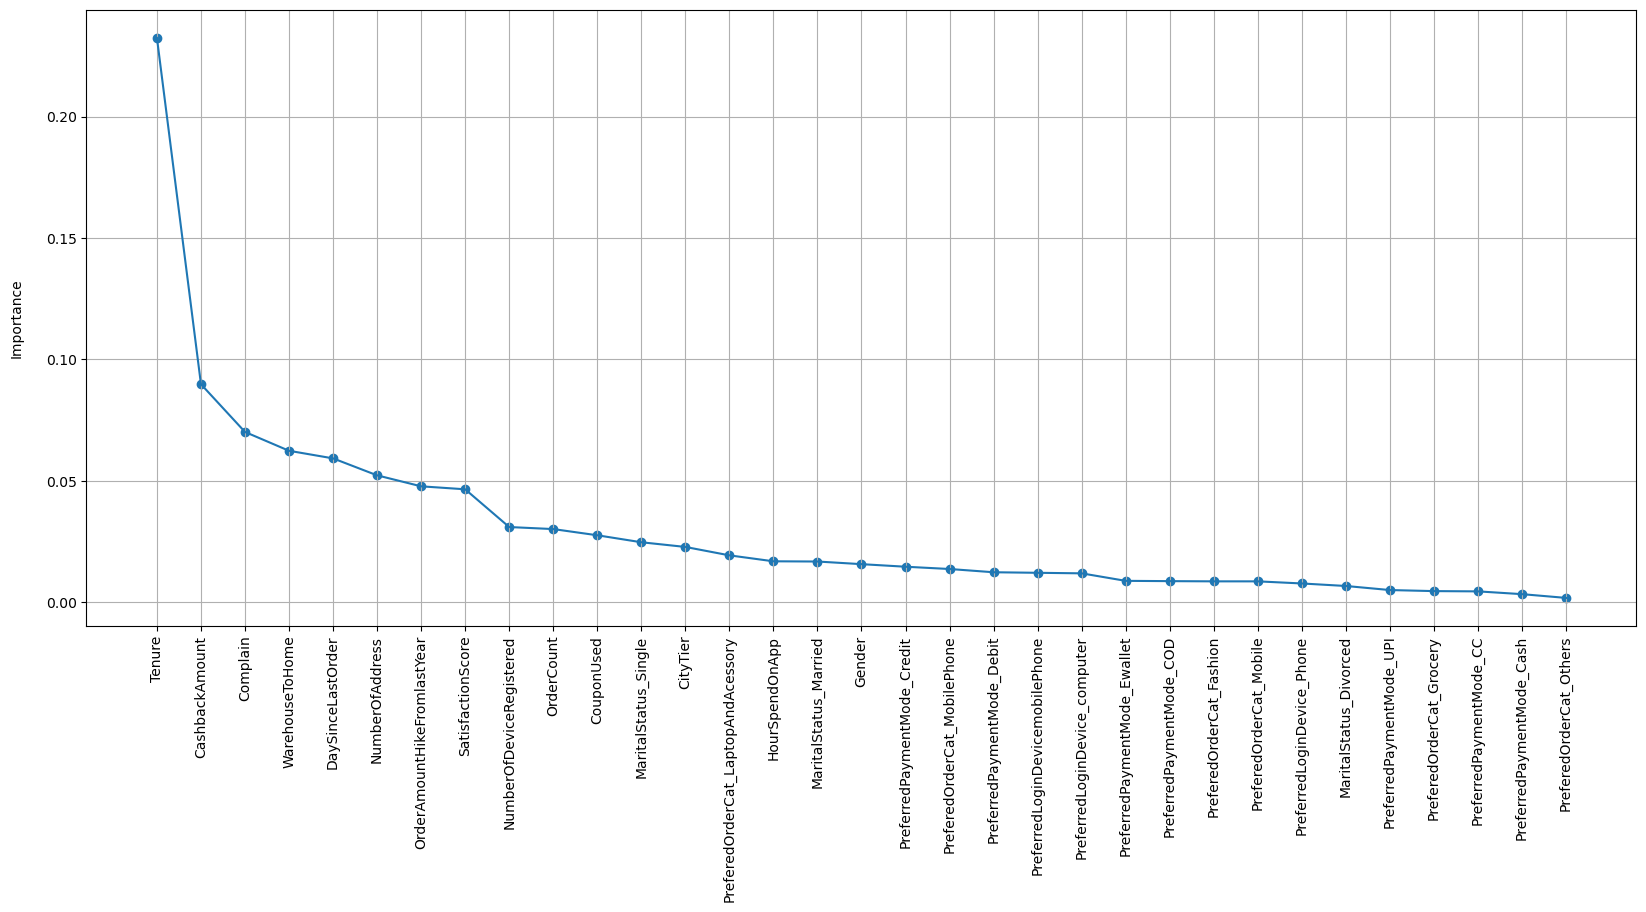

In [5]:
plt.figure(figsize=(20,8))
plt.xticks(rotation=90)
plt.plot(feature_importances)
plt.scatter(y=feature_importances.importance,x=feature_importances.index)
plt.ylabel('Importance\n')
plt.grid()
plt.show()

#### Predição e Métricas

In [6]:
y_predicted = rf.predict(np.array(x_test))

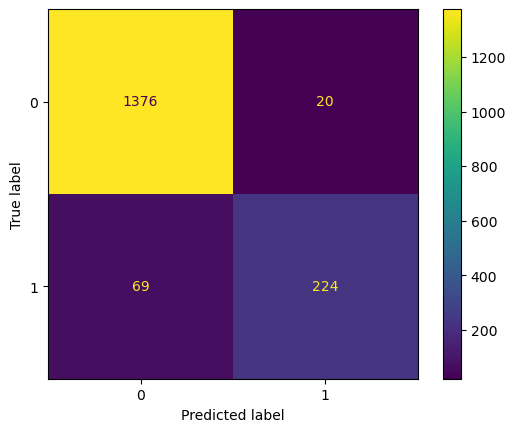

In [7]:
ConfusionMatrixDisplay.from_estimator(rf, np.array(x_test), np.array(y_test['Churn']))
plt.show()

In [8]:
accuracy = accuracy_score(y_test, y_predicted)
print(f'Acurácia: {accuracy:.5f}')

Acurácia: 0.94731


In [9]:
report = classification_report(y_test, y_predicted)
print('Relatório de Classificação:\n', report)

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97      1396
           1       0.92      0.76      0.83       293

    accuracy                           0.95      1689
   macro avg       0.94      0.88      0.90      1689
weighted avg       0.95      0.95      0.95      1689

